$$
-1 = - \left( 1 - \frac{2M}{r}  \right) \dot{t}^2 + \left( 1 - \frac{2M}{r}  \right)^{-1} \dot{r}^2 + r^2 \dot{\phi}^2
$$

$$
\frac{E^2}{L^2} - \frac{1}{r^2} \left( 1 - \frac{2M}{r}  \right) - \frac{1}{L^2} \left( 1 - \frac{2M}{r}  \right) = \left( \frac{1}{r^2}\left( \frac{dr}{d\phi} \right) \right)^2
$$

# 解析

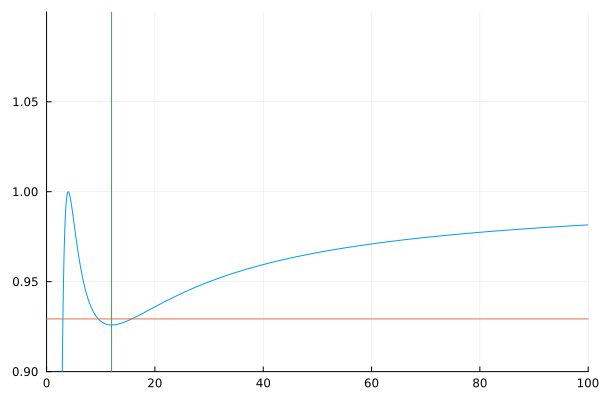

In [94]:
using Plots
E, L = 0.964, 4.0
x_list, y_list = [], []
for i in 2:0.01:100
    push!(x_list, i)
    push!(y_list, -2 * L^2 / i^3 + L^2 / i^2 - 2 / i + 1)
end

plt = plot(
    xlim=(0, 100), ylim=(0.90, 1.1),
    # framestyle=:none,
)

plot!(plt, x_list, y_list, legend=false)
plot!(plt, [0, 100], [E^2, E^2], legend=false)
plot!(plt, [12, 12], [0, 100], legend=false)

# データ作成

0.027777777777777776

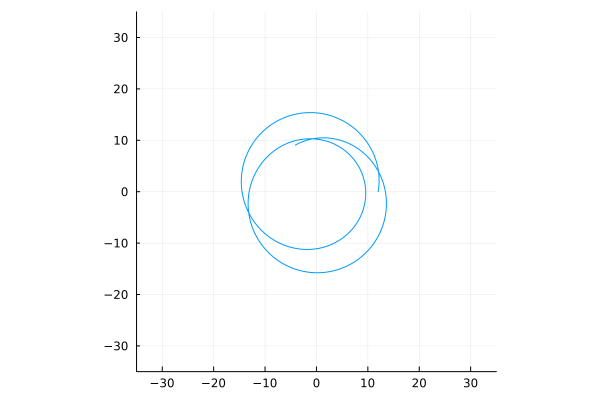

In [101]:
using DifferentialEquations
using Plots

function f!(du, u, p, t)
    du[1] = u[4]
    du[2] = u[5]
    du[3] = u[6]
    du[4] = - 2 / u[2]^2 * 1 / (1 - 2/u[2]) * u[4] * u[5]
    du[5] = - 1 / u[2]^2 * (1 - 2/u[2]) * u[4]^2 + 1 / (u[2]^2 * (1 - 2/u[2])) * u[5]^2 + (1 - 2/u[2]) * u[2] * u[6]^2
    du[6] = - 2 / u[2] * u[5] * u[6]
end

r, E, L = 12.0, 0.964, 4.0

dot_t = E / ( 1 - 2/r )
dot_phi = L / r^2
dot_r = sqrt(E^2 + 2 * L^2 / r^3 - L^2 / r^2 + 2 / r - 1)
print(dot_phi)

u0 = [0.0, r,  0.0, dot_t, dot_r, dot_phi] # t, r, phi, dot_t, dot_r, dot_phi
tspan = (0.0, 600)
dt = 0.1

prob = ODEProblem(f!, u0, tspan, p=[])
sol = solve(prob, Tsit5(), saveat=dt)

y_list = [ sol[i][2] * sin(sol[i][3]) for i in 1:length(sol) ]
x_list = [ sol[i][2] * cos(sol[i][3]) for i in 1:length(sol) ]

# plot(x_list, y_list)
plt = plot(
    xlim=(-35, 35), ylim=(-35, 35),
    legend=false,
    ratio=1, # アスペクト比を指定
    # dpi=800, # 解像度を指定
    # grid=false,
    # framestyle=:none, # 軸を消す
)
plot!(plt, x_list, y_list)
plt

# 実験

0.0004

┌ Warning: At t=196.83751619713166, dt was forced below floating point epsilon 2.842170943040401e-14, and step error estimate = 96.71939156900942. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/sakPO/src/integrator_interface.jl:633


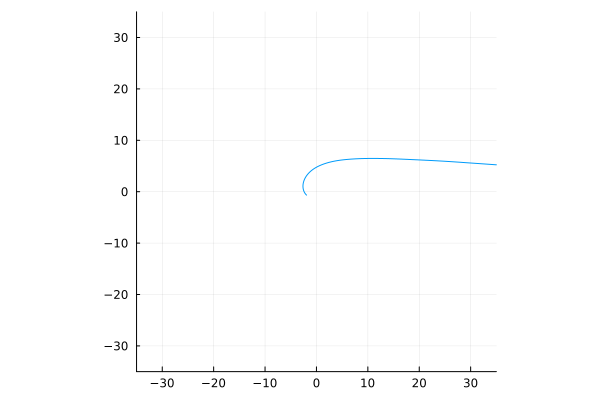

In [106]:
using DifferentialEquations
using Plots

function f!(du, u, p, t)
    du[1] = u[4]
    du[2] = u[5]
    du[3] = u[6]
    du[4] = - 2 / u[2]^2 * 1 / (1 - 2/u[2]) * u[4] * u[5]
    du[5] = - 1 / u[2]^2 * (1 - 2/u[2]) * u[4]^2 + 1 / (u[2]^2 * (1 - 2/u[2])) * u[5]^2 + (1 - 2/u[2]) * u[2] * u[6]^2
    du[6] = - 2 / u[2] * u[5] * u[6]
end

r, E, L = 100.0, 1.1, 4.0

dot_t = E / ( 1 - 2/r )
dot_phi = L / r^2
dot_r = - sqrt(E^2 + 2 * L^2 / r^3 - L^2 / r^2 + 2 / r - 1)
print(dot_phi)

u0 = [0.0, r,  0.0, dot_t, dot_r, dot_phi] # t, r, phi, dot_t, dot_r, dot_phi
tspan = (0.0, 600)
dt = 0.1

prob = ODEProblem(f!, u0, tspan, p=[])
sol = solve(prob, Tsit5(), saveat=dt)

y_list = [ sol[i][2] * sin(sol[i][3]) for i in 1:length(sol) ]
x_list = [ sol[i][2] * cos(sol[i][3]) for i in 1:length(sol) ]

# plot(x_list, y_list)
plt = plot(
    xlim=(-35, 35), ylim=(-35, 35),
    legend=false,
    ratio=1, # アスペクト比を指定
    # dpi=800, # 解像度を指定
    # grid=false,
    # framestyle=:none, # 軸を消す
)
plot!(plt, x_list, y_list)
plt

0.027777777777777776

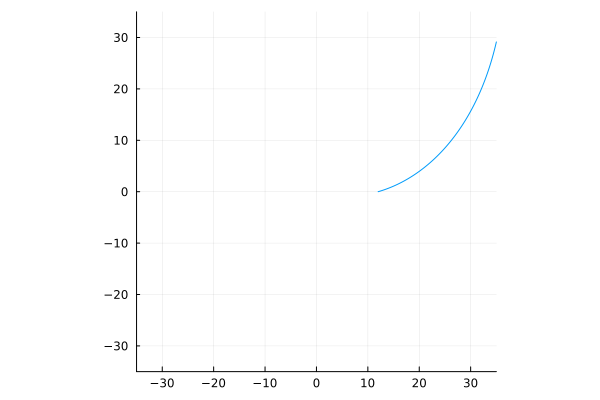

In [ ]:
using DifferentialEquations
using Plots

function f!(du, u, p, t)
    du[1] = u[4]
    du[2] = u[5]
    du[3] = - 2 / u[1]^2 * 1 / (1 - 2/u[1]) * u[3] * u[4]
    du[4] = - 1 / u[1]^2 * (1 - 2/u[1]) * u[3]^2 + 1 / (u[1]^2 * (1 - 2/u[1])) * u[4]^2 + (1 - 2/u[1]) * u[1] * u[5]^2
    du[5] = - 2 / u[1] * u[4] * u[5]
end

r, E, L = 13.0, 0.963, 4.0

dot_t = E / ( 1 - 2/r )
dot_phi = L / r^2
dot_r = sqrt(E^2 + 2 * L^2 / r^3 - L^2 / r^2 + 2 / r - 1)

u0 = [r,  0.0, dot_t, dot_r, dot_phi] # r, phi, dot_t, dot_r, dot_phi
tspan = (0.0, 500)
dt = 0.1

p = []
prob = ODEProblem(f!, u0, tspan, p)
sol = solve(prob, Tsit5(), saveat=dt)

y_list = [ sol[i][1] * sin(sol[i][2]) for i in 1:length(sol) ]
x_list = [ sol[i][1] * cos(sol[i][2]) for i in 1:length(sol) ]

plt = plot(
    xlim=(-2*r, 2*r), ylim=(-2*r, 2*r),
    legend=false,
    ratio=1, # アスペクト比を指定
    dpi=800, # 解像度を指定
    # grid=false,
    # framestyle=:none, # 軸を消す
)

color_values = range(0, stop=1, length=length(x_list))
plot!(plt, x_list, y_list, line_z=color_values, c=:viridis)
plt

# backup

0.023668639053254437

[ Info: Saved animation to /Users/motoki/Desktop/mo-to-ki/research/codes/julia/schwarzs-orbit/animation.gif


Plots.AnimatedGif("/Users/motoki/Desktop/mo-to-ki/research/codes/julia/schwarzs-orbit/animation.gif")
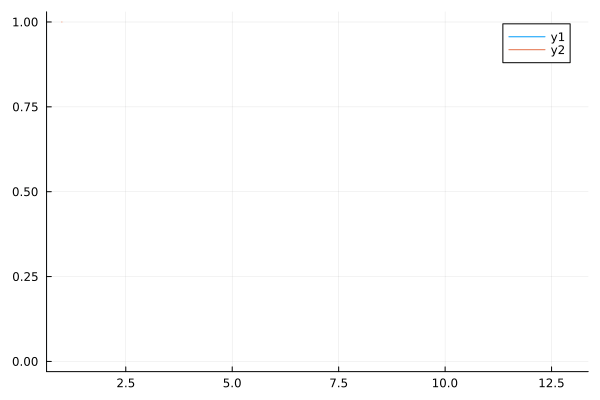

In [86]:
using DifferentialEquations
using Plots

function f!(du, u, p, t)
    du[1] = u[4]
    du[2] = u[5]
    du[3] = - 2 / u[1]^2 * 1 / (1 - 2/u[1]) * u[3] * u[4]
    du[4] = - 1 / u[1]^2 * (1 - 2/u[1]) * u[3]^2 + 1 / (u[1]^2 * (1 - 2/u[1])) * u[4]^2 + (1 - 2/u[1]) * u[1] * u[5]^2
    # du[4] = sqrt( ( 1 - 2/u[1] ) * u[3]^2 - ( 1 - 2/u[1] ) * ( 1 + u[1]^2 * u[5]^2 ) )
    du[5] = - 2 / u[1] * u[4] * u[5]
end

r, E, L = 13.0, 1, 4.0

dot_t = E / ( 1 - 2/r )
dot_phi = L / r^2
dot_r = sqrt(E^2 + 2 * L^2 / r^3 - L^2 / r^2 + 2 / r - 1)
print(dot_phi)

u0 = [r,  0.0, dot_t, 0, dot_phi] # r, phi, dot_t, dot_r, dot_phi
tspan = (0.0, 600)
dt = 0.1

prob = ODEProblem(f!, u0, tspan, p=[])
sol = solve(prob, Tsit5(), saveat=dt)

y_list = [ sol[i][1] * sin(sol[i][2]) for i in 1:length(sol) ]
x_list = [ sol[i][1] * cos(sol[i][2]) for i in 1:length(sol) ]

# plot(x_list, y_list)
plt = plot(
    xlim=(-35, 35), ylim=(-35, 35),
    legend=false,
    ratio=1, # アスペクト比を指定
    # dpi=800, # 解像度を指定
    # grid=false,
    # framestyle=:none, # 軸を消す
)
anim = @animate for i in 1:length(x_list)-5000
    plot(x_list[1:i], y_list[1:i])
    plot!([1,i], [1,i])
end

# GIFとして保存
gif(anim, "animation.gif", fps=15)